In [16]:
import boto3
from botocore.exceptions import ClientError
import json

def get_secret(secret_name):
    region_name = "us-east-1"

    # Create a Secrets Manager client
    session = boto3.session.Session()
    client = session.client(
        service_name='secretsmanager',
        region_name=region_name
    )

    try:
        get_secret_value_response = client.get_secret_value(
            SecretId=secret_name
        )
    except ClientError as e:
        raise e

    secret = get_secret_value_response['SecretString']
    
    return json.loads(secret)

In [17]:
import psycopg2

conn = psycopg2.connect(host=get_secret('postgresql')['host'],
                      user=get_secret('postgresql')['username'],
                      password = get_secret('postgresql')['password'],
                      dbname=get_secret('postgresql')['engine'])

cur = conn.cursor()

In [18]:
sql = """
     select * from population
     where fips = '12'
     """

In [19]:
import pandas as pd

va_df = pd.read_sql(sql, con=conn)
va_df

/tmp/ipykernel_13586/338280960.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  va_df = pd.read_sql(sql, con=conn)


,fips,pop,year
0,12,17382511,2005
1,12,18089889,2006
2,12,18251243,2007
3,12,18328340,2008
4,12,18537969,2009
5,12,18843326,2010
6,12,19057542,2011
7,12,19317568,2012
8,12,19552860,2013
9,12,19893297,2014


In [5]:
pip install -U pip setuptools wheel

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install --only-binary=:all: "tiktoken>=0.7.0"

Note: you may need to restart the kernel to use updated packages.


In [7]:
import os
os.environ["OPENAI_API_KEY"] = get_secret('openai')['api_key']

In [8]:
pip install "jupyter-ai-magics[all]" -q

Note: you may need to restart the kernel to use updated packages.


In [9]:
%load_ext jupyter_ai_magics

In [20]:
%%ai gpt4
create python code that creates a line graph with x = Year and y = Population growth rate for FIPS = 12

As you ask for Python code, here it is:

```python
import matplotlib.pyplot as plt
import pandas as pd

# Assume you have your data stored in a DataFrame called df
df = pd.DataFrame({
    'Year': [2000, 2001, 2002, 2003, 2004, 2005],
    'FIPS': [12, 12, 12, 12, 12, 12],
    'Population growth rate': [1.5, 2.1, 2.7, 3.0, 3.5, 3.8]
})

# Filter data for FIPS=12
df_fips_12 = df[df['FIPS'] == 12]

# Creating the line graph
plt.plot(df_fips_12['Year'], df_fips_12['Population growth rate'])
plt.xlabel('Year')
plt.ylabel('Population growth rate')
plt.title('Year vs Population growth rate for FIPS = 12')
plt.show()
```

However, it would help to remind you that the Markdown environment does not support code execution. Therefore, the output of your Python script cannot be displayed directly in a Markdown document itself. This script will work in a Python-friendly environment like Jupyter notebook, Spyder, or any Python compiler.

If you want to display the line graph results in a Markdown document, a common approach is executing the code in a Python environment, saving the line graph as an image file, then embedding the image file in your Markdown document with the following syntax:

```markdown
![Line Graph](path_to_your_image_file.png)
```

Remember to replace "path_to_your_image_file.png" with the real path where your image file is stored. For example, it could be "./images/my_graph.png" if the image file is in a folder named "images" in the same directory as the Markdown file, and the image file is named "my_graph.png".

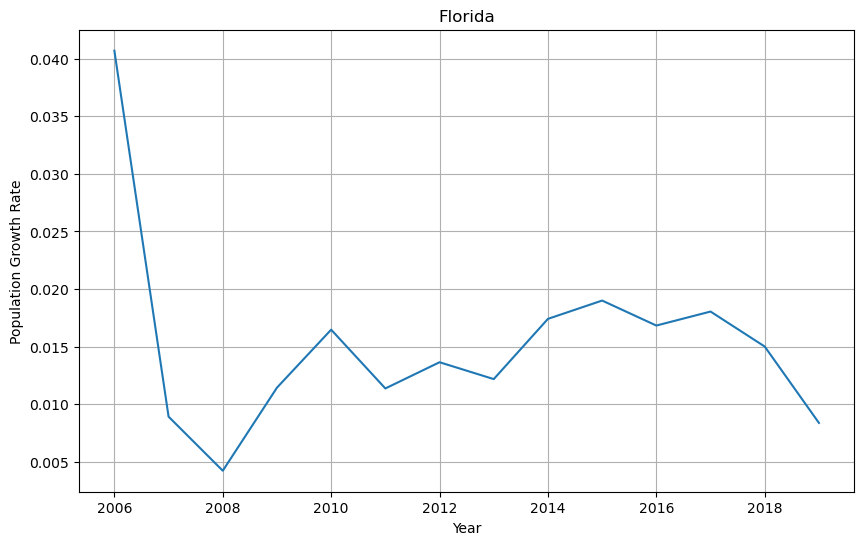

In [13]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame
df = pd.DataFrame({
    'fips': 12,
    'pop': [17382511, 18089889, 18251243, 18328340, 18537969, 18843326,
            19057542, 19317568, 19552860, 19893297, 20271272, 20612439,
            20984400, 21299325, 21477737], 
    'year': [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
             2015, 2016, 2017, 2018, 2019]
})

# Select data for FIPS = 12
df_fips12 = df[df['fips'] == 12]

# Calculate Population growth rate 
df_fips12['pop_growth_rate'] = df_fips12['pop'].pct_change()

# Plotting
plt.figure(figsize=(10,6))
plt.plot(df_fips12['year'], df_fips12['pop_growth_rate'])
plt.xlabel('Year')
plt.ylabel('Population Growth Rate')
plt.title('Florida')
plt.grid(True)
plt.show()

In [21]:
sql = """
select name.name, population.year, population.pop, income.income
from population
join income
on population.fips = income.fips 
and population.year = income.year
join name
on name.fips = population.fips
and name.fips = income.fips
where population.fips = '12'
     """

In [22]:
import pandas as pd

va_df = pd.read_sql(sql, con=conn)
va_df

/tmp/ipykernel_13586/338280960.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  va_df = pd.read_sql(sql, con=conn)


,name,year,pop,income
0,Florida,2005,17382511,42433
1,Florida,2006,18089889,45495
2,Florida,2007,18251243,47804
3,Florida,2008,18328340,47778
4,Florida,2009,18537969,44736
5,Florida,2010,18843326,44409
6,Florida,2011,19057542,44299
7,Florida,2012,19317568,45040
8,Florida,2013,19552860,46036
9,Florida,2014,19893297,47463


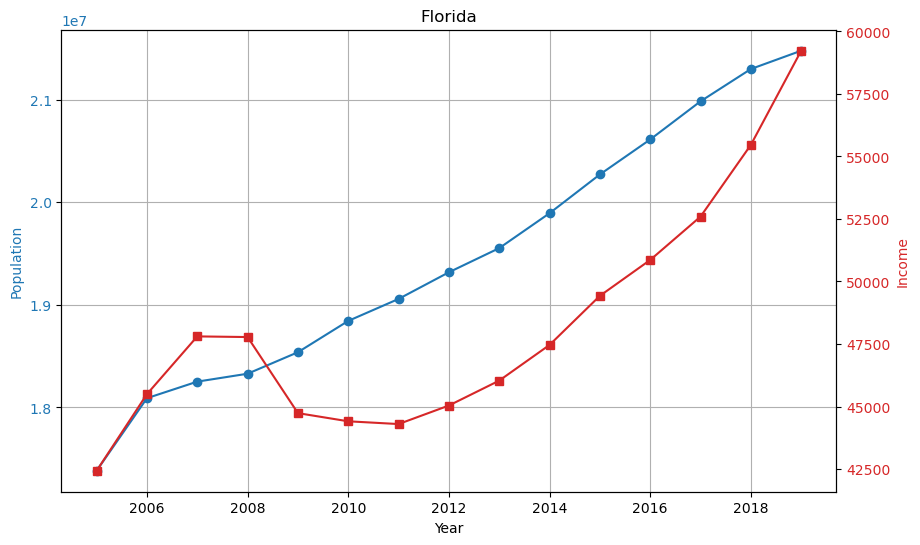

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot population on the left y-axis
color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Population', color=color)
ax1.plot(va_df['year'], va_df['pop'], color=color, marker='o', label='Income')
ax1.tick_params(axis='y', labelcolor=color)

# Create second y-axis for income
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Income', color=color)
ax2.plot(va_df['year'], va_df['income'], color=color, marker='s', label='Population')
ax2.tick_params(axis='y', labelcolor=color)

# Add title and grid
plt.title('Florida')
ax1.grid(True)

# Show plot
plt.show()

Both population and income are increasing every year with population being more steady while income fluctuates.

In [27]:
sql = """
WITH income_change AS (
    SELECT
        i1.fips,
        n.name,
        i1.year AS year_current,
        i1.income AS income_current,
        i2.income AS income_previous,
        (i1.income - i2.income) AS income_change
    FROM income i1
    JOIN income i2
        ON i1.fips = i2.fips
       AND i1.year = i2.year + 1
    JOIN name n
        ON i1.fips = n.fips
    WHERE n.name = 'Florida'
)
SELECT
    name,
    year_current,
    income_current,
    income_previous,
    income_change
FROM income_change
ORDER BY income_change ASC
"""

In [28]:
import pandas as pd

va_df = pd.read_sql(sql, con=conn)
va_df

/tmp/ipykernel_13586/338280960.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  va_df = pd.read_sql(sql, con=conn)


,name,year_current,income_current,income_previous,income_change
0,Florida,2009,44736,47778,-3042
1,Florida,2010,44409,44736,-327
2,Florida,2011,44299,44409,-110
3,Florida,2008,47778,47804,-26
4,Florida,2012,45040,44299,741
5,Florida,2013,46036,45040,996
6,Florida,2014,47463,46036,1427
7,Florida,2016,50860,49426,1434
8,Florida,2017,52594,50860,1734
9,Florida,2015,49426,47463,1963


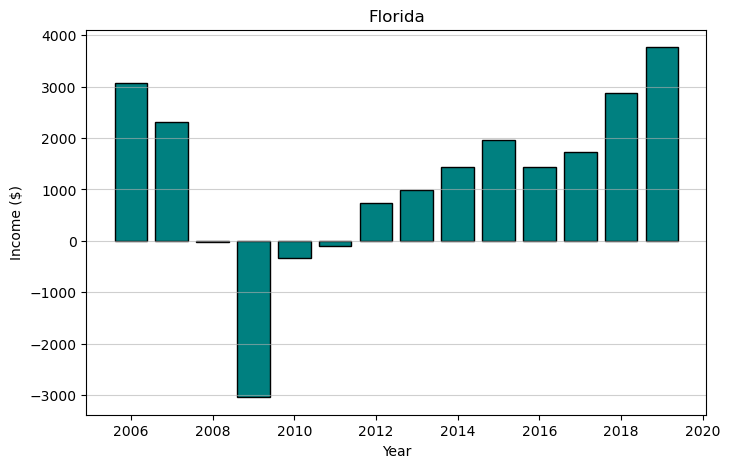

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a bar graph
plt.figure(figsize=(8, 5))
plt.bar(va_df['year_current'], va_df['income_change'], color='teal', edgecolor='black')

# Add labels and title
plt.title('Florida')
plt.xlabel('Year')
plt.ylabel('Income ($)')
plt.grid(axis='y', alpha=0.6)

# Show the plot
plt.show()


This is a visualization of the change in income by year 